## **Task 2**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("tested.csv")

In [4]:
print("Column names:", df.columns.tolist())
print("\nNumber of rows:", len(df))
print("\nData Types:\n", df.dtypes)

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Number of rows: 418

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

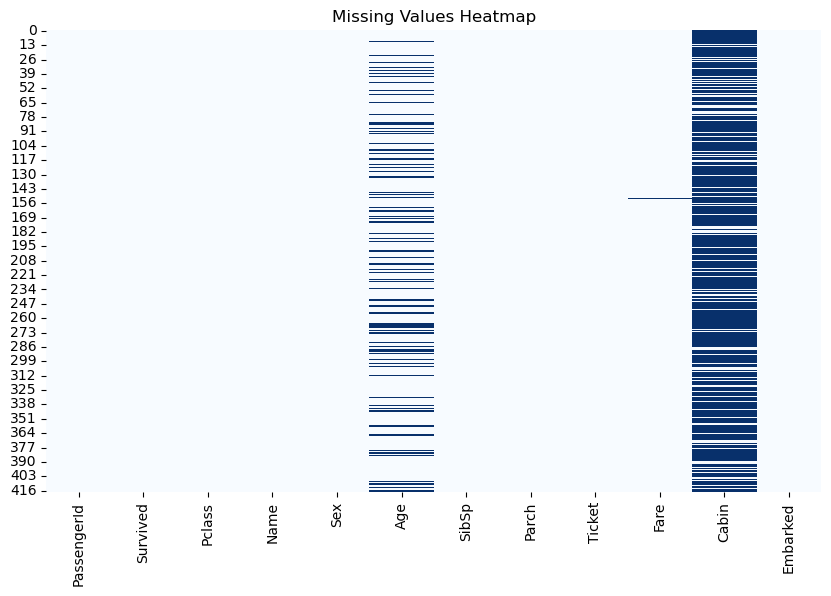

In [8]:
plt.figure(figsize=(10,6))
sb.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
df = df.dropna(subset=['Cabin'])
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first = True)
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)
df.head()

In [ ]:
ax = sb.countplot(x = 'Sex_male', hue = 'Survived', data = df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks([0,1], ['Female', 'Male'])
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()